# Quickstart

This is a guide to using the ATMO equilibrium chemistry plugin for TauREx 3.1, developed by Michelle Fabienne Bieger and Ahmed Al-Refaie.

## Prerequisites

Before using this plugin, please ensure that you have already installed TauREx (https://taurex3-public.readthedocs.io/; please note you will also need absorption cross sections) and ATMO (https://www.gitlab.erc-atmo.eu/1-2d_tools/atmo). To receive access to ATMO, please contact Pascal Tremblin of CEA Saclay: pascal.tremblin@cea.fr 

In [1]:
# Check that you have the latest version of TauREx (3.1.1-alpha)
# Git-clone the UCL GitHub page in order to get the latest version 

import taurex
print(taurex.__version__)

3.1.1-alpha


Now let's see if your frogr has installed correctly: 

In [15]:
# Check that you have installed frogr correctly
import atmopy
# print(atmopy.__version__)

AttributeError: module 'atmopy' has no attribute '__version__'

Make sure to set the path to an established ATMO .exe! 

In [2]:
import os
os.environ["ATMO_PATH"]="/Users/mbieger/atmo/tutorial/chem_eq/"

In [4]:
# Importing required interactive plotting packages 

import matplotlib.pyplot as plt
%matplotlib notebook
from ipywidgets import *
import numpy as np
import pickle
import sys

In [5]:
# Load required TauREx cross sections
# Customise to your system paths as required 
from taurex.cache import OpacityCache,CIACache

OpacityCache().clear_cache()
OpacityCache().set_opacity_path("/Users/mbieger/data/xsec/xsec_sampled_R15000_0")
CIACache().set_cia_path("/Users/mbieger/data/cia/HITRAN/data")

# Showcasing the use of the ATMOPy plugin 

In this section, we'll be exploring how to use the ATMOPy plugin. First, we'll set up a TauREx model and then insert the ATMOPy chemistry to see how that affects the forward model and subsequent retrievals.

### Setting up the forward model 

In [6]:
# Select a temperature profile
from taurex.temperature import Isothermal
iso = Isothermal(T=1900.0)

# Setting up the planet
from taurex.planet import Planet
planet = Planet(planet_radius=1.53,planet_mass=0.85)

# Setting up a host blackbody star
from taurex.stellar import BlackbodyStar
star = BlackbodyStar(temperature=6600.0,radius=1.51)

# Setting up a chemistry profile: we want to use our newfound fun toy
from atmopy.taurex import ATMOChemistry

# Initialising a transmission model with pressures and layers and incorporating our previously loaded profiles
from taurex.model import TransmissionModel
tm = TransmissionModel(planet=planet,
                       temperature_profile=iso,
                       chemistry=ATMOChemistry(),
                       star=star,
                       atm_min_pressure=1e-0,
                       atm_max_pressure=1e6,
                       nlayers=30)

taurex.ClassFactory - INFO - Reloading all modules and plugins
taurex.ClassFactory - INFO - ----------Plugin loading---------
taurex.ClassFactory - INFO - Loading atmo
taurex.TransmissionModel - INFO - No pressure profile defined, using simple pressure profile with
taurex.TransmissionModel - INFO - parameters nlayers: 30, atm_pressure_range=(1.0,1000000.0)


In [7]:
# Adding in actual physics to the model now with absorptions 
from taurex.contributions import AbsorptionContribution
tm.add_contribution(AbsorptionContribution())

# CIA absorption
from taurex.contributions import CIAContribution
tm.add_contribution(CIAContribution(cia_pairs=['H2-H2','H2-He']))

# Rayleigh scattering
from taurex.contributions import RayleighContribution
tm.add_contribution(RayleighContribution())

Now we can build the transmission build and run it. Res ("result") of the transmission model will have four components (grouped via arrays) to it: 

- The wavenumber grid
- The *native* flux
- The optical depth
- Any extra information

In [8]:
# Building the transmission model up
tm.build()

# Running the transmission model
res = tm.model()
res

taurex.TransmissionModel - INFO - Building model........
taurex.TransmissionModel - INFO - Collecting paramters
taurex.TransmissionModel - INFO - Setting up profiles
taurex.TransmissionModel - INFO - Computing pressure profile
taurex.ChemistryModel - INFO - Initializing chemistry model


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.TransmissionModel - INFO - Setting up contributions
taurex.TransmissionModel - INFO - DONE
taurex.TransmissionModel - INFO - Computing pressure profile


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.PickleOpacity:CO.R15000. - INFO - Loading opacity from /Users/mbieger/data/xsec/xsec_sampled_R15000_0/CO.R15000.TauREx.pickle
taurex.OpacityCache - INFO - Reading opacity CO
taurex.OpacityCache - INFO - Loading opacity CO into model
taurex.PickleOpacity:H2O.R15000 - INFO - Loading opacity from /Users/mbieger/data/xsec/xsec_sampled_R15000_0/H2O.R15000.TauREx.pickle
taurex.OpacityCache - INFO - Reading opacity H2O
taurex.OpacityCache - INFO - Loading opacity H2O into model
taurex.PickleOpacity:CH4.R15000 - INFO - Loading opacity from /Users/mbieger/data/xsec/xsec_sampled_R15000_0/CH4.R15000.TauREx.pickle
taurex.OpacityCache - INFO - Reading opacity CH4
taurex.OpacityCache - INFO - Loading opacity CH4 into model
taurex.PickleOpacity:CO2.R15000 - INFO - Loading opacity from /Users/mbieger/data/xsec/xsec_sampled_R15000_0/CO2.R15000.TauREx.pickle
taurex.OpacityCache - INFO - Reading opacity CO2
taurex.OpacityCache - INFO - Loading opacity CO2 into model
taurex.PickleOpacity:NH3.R15000

(array([  199.99326855,   200.00660143,   200.01993521, ...,
        33328.88933329, 33331.11125925, 33333.33333333]),
 array([0.01145063, 0.01215235, 0.01216982, ..., 0.01215074, 0.0121508 ,
        0.01215086]),
 array([[4.74154636e-241, 0.00000000e+000, 0.00000000e+000, ...,
         8.26609065e-014, 8.22295765e-014, 8.25860749e-014],
        [7.35520686e-097, 0.00000000e+000, 0.00000000e+000, ...,
         5.82226359e-006, 5.80116745e-006, 5.82043175e-006],
        [3.52506023e-039, 0.00000000e+000, 0.00000000e+000, ...,
         1.20998319e-144, 1.09741158e-144, 1.00015416e-144],
        ...,
        [9.99999994e-001, 9.99879320e-001, 9.99733435e-001, ...,
         9.97407698e-001, 9.97406903e-001, 9.97406180e-001],
        [9.99999998e-001, 9.99938227e-001, 9.99859979e-001, ...,
         9.98615362e-001, 9.98614937e-001, 9.98614551e-001],
        [9.99999999e-001, 9.99974709e-001, 9.99941768e-001, ...,
         9.99423835e-001, 9.99423657e-001, 9.99423497e-001]]),
 None)

In [8]:
list(tm.fittingParameters.keys())

['planet_mass',
 'planet_radius',
 'planet_distance',
 'planet_sma',
 'atm_min_pressure',
 'atm_max_pressure',
 'T',
 'metallicity']

### Plot the chemistry of the atmosphere

<IPython.core.display.Javascript object>


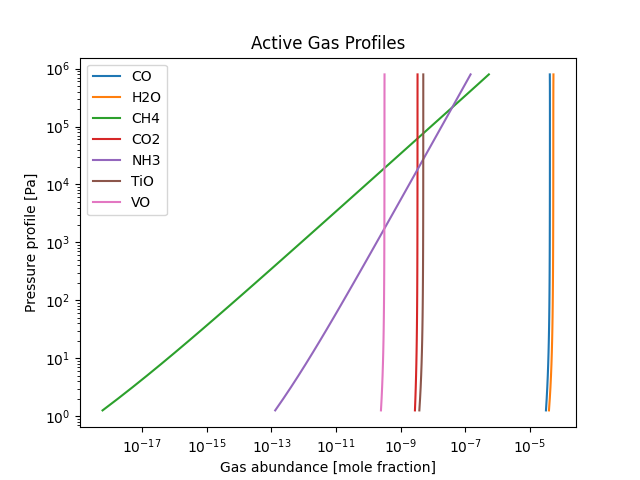

In [9]:
plt.figure()

for x,gasname in enumerate(tm.chemistry.activeGases):
    plt.plot(tm.chemistry.activeGasMixProfile[x],tm.pressureProfile,label=gasname)

# for x,gasname in enumerate(tm.chemistry.inactiveGases):
#     plt.plot(tm.chemistry.inactiveGasMixProfile[x],tm.pressureProfile/1e5,label=gasname)

plt.xscale("log")
plt.xlabel("Gas abundance [mole fraction]")

# plt.gca().invert_yaxis()
plt.yscale("log")
plt.ylabel("Pressure profile [Pa]")

plt.title("Active Gas Profiles")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


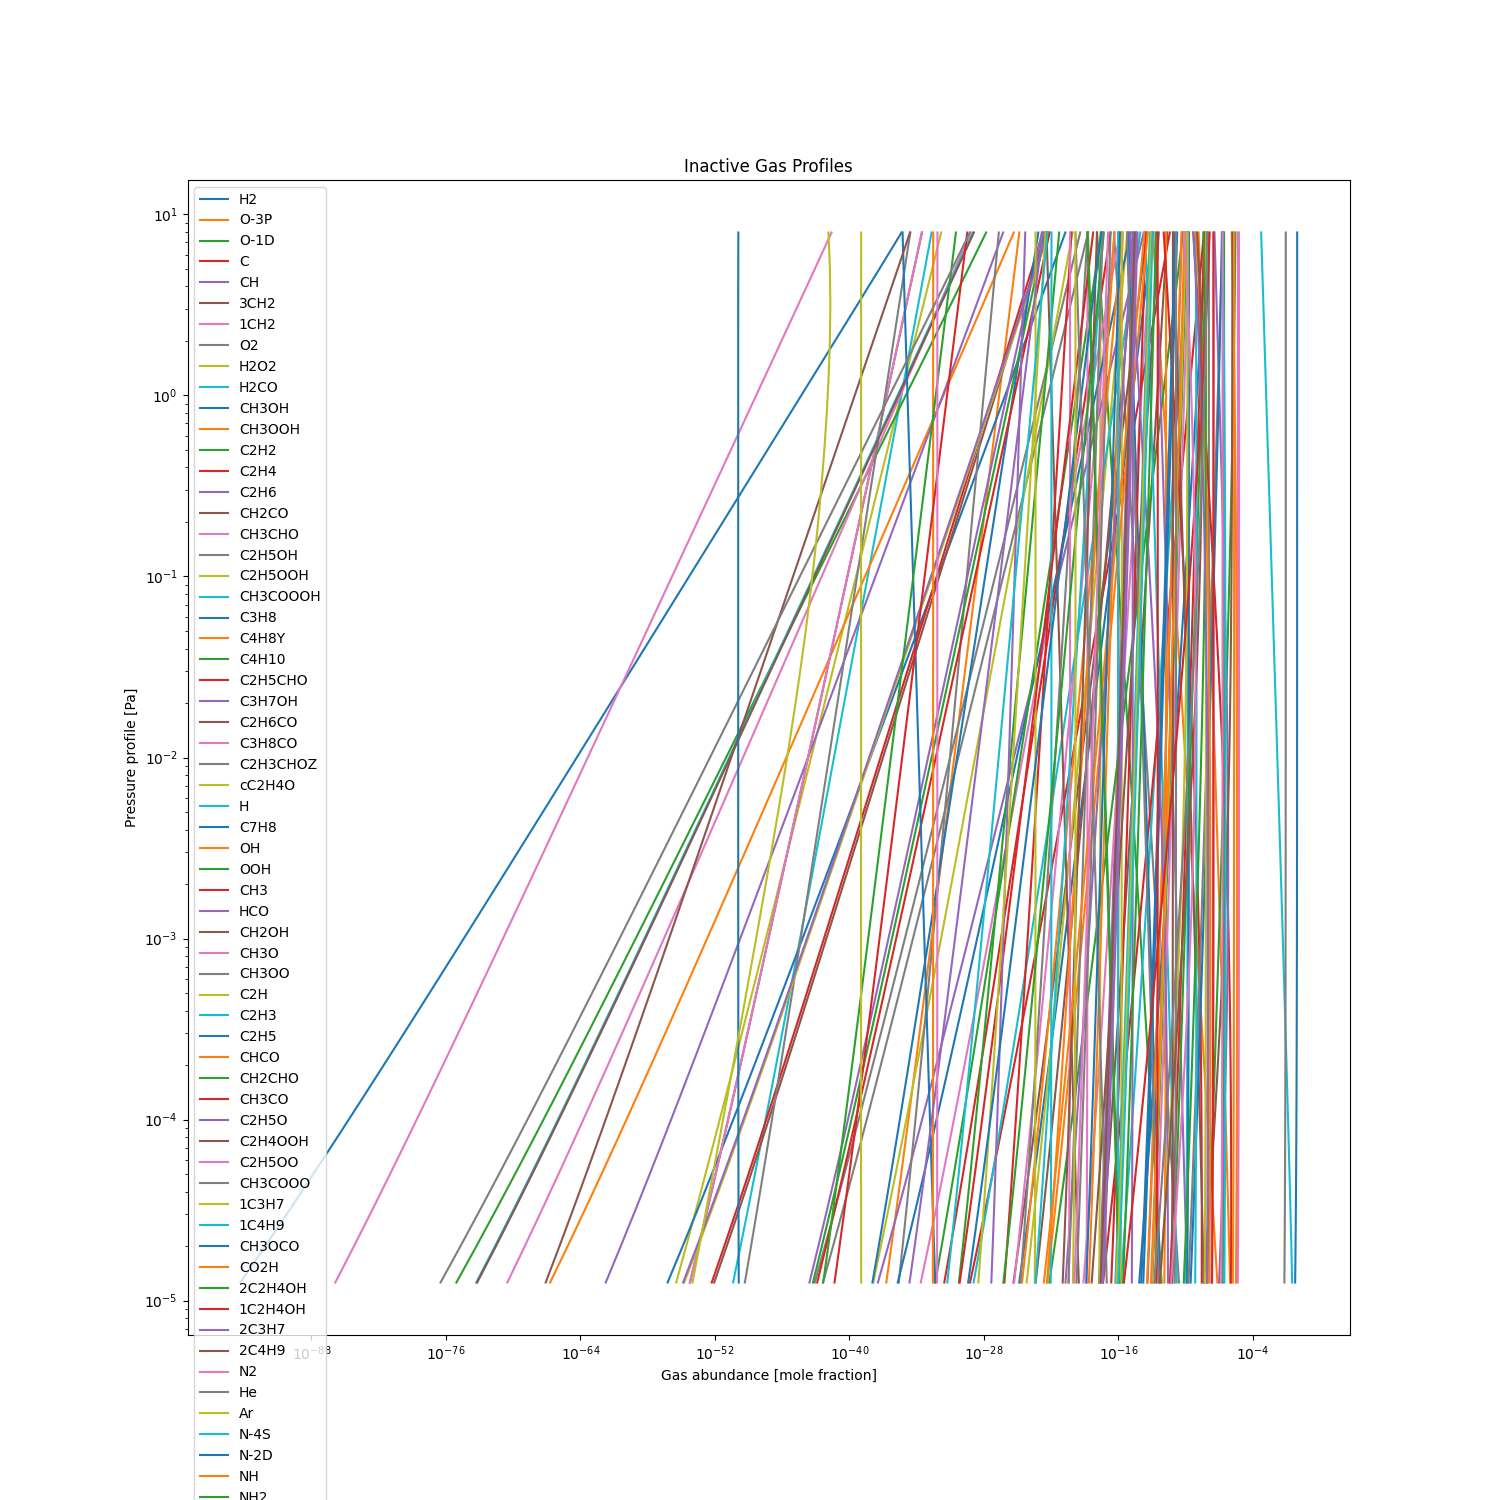

In [10]:
plt.figure(figsize=(15,15))

for x,gasname in enumerate(tm.chemistry.inactiveGases):
    plt.plot(tm.chemistry.inactiveGasMixProfile[x],tm.pressureProfile/1e5,label=gasname)

plt.xscale("log")
plt.xlabel("Gas abundance [mole fraction]")

# plt.gca().invert_yaxis()
plt.yscale("log")
plt.ylabel("Pressure profile [Pa]")

plt.title("Inactive Gas Profiles")
plt.legend()
plt.show()

### Plot the flux of the atmosphere (and bin it!)

<IPython.core.display.Javascript object>


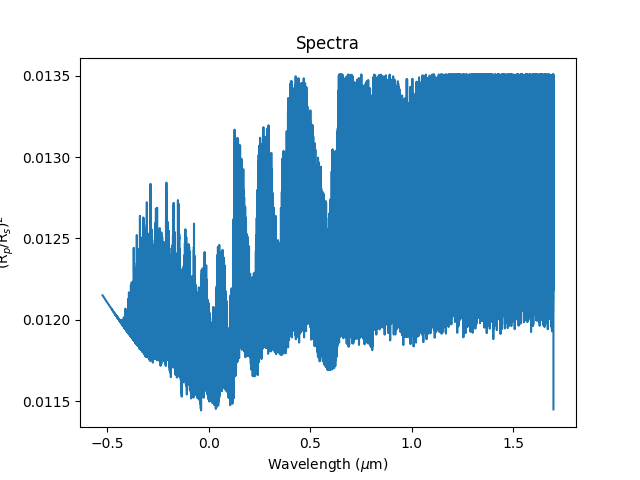

In [11]:
native_grid, rprs, tau, _ = res

full_fig = plt.figure()
plt.plot(np.log10(10000/native_grid),rprs)

plt.xlabel(r"Wavelength ($\mu$m)")
plt.ylabel(r"(R$_p$/R$_s)^2$")
plt.title("Spectra")
plt.show()

<IPython.core.display.Javascript object>


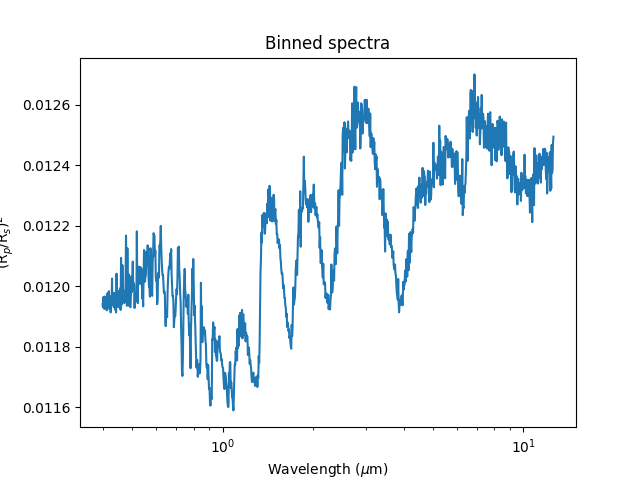

taurex.TransmissionModel - INFO - Computing pressure profile


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.Absorption - INFO - Done
taurex.CIA - INFO - Computing CIA 
taurex.CIA - INFO - Done
taurex.Rayleigh - INFO - Done


In [12]:
from taurex.binning import FluxBinner,SimpleBinner
binned_fig = plt.figure()


# Make a logarithmic grid
wngrid = np.sort(10000/np.logspace(-0.4,1.1,1000))
bn = SimpleBinner(wngrid=wngrid)

bin_wn, bin_rprs,_,_  = bn.bin_model(tm.model(wngrid=wngrid))

plt.plot(10000/bin_wn,bin_rprs)

plt.xscale('log')
plt.xlabel(r"Wavelength ($\mu$m)")
plt.ylabel(r"(R$_p$/R$_s)^2$")
plt.title("Binned spectra")

plt.show()

### Transmission, emission, and direct imaging too

In [13]:
# Setting up emission and direct image, in the same vein as the TM above 
from taurex.model import EmissionModel, DirectImageModel
em = EmissionModel(planet=planet,
                       temperature_profile=iso,
                       chemistry=ATMOChemistry(),
                       star=star,
                        atm_min_pressure=1e-0,
                       atm_max_pressure=1e6,
                       nlayers=30)
di = DirectImageModel(planet=planet,
                       temperature_profile=iso,
                       chemistry=ATMOChemistry(),
                       star=star,
                        atm_min_pressure=1e-0,
                       atm_max_pressure=1e6,
                       nlayers=30)

em.add_contribution(AbsorptionContribution())
em.add_contribution(CIAContribution(cia_pairs=['H2-H2','H2-He']))
em.add_contribution(RayleighContribution())

di.add_contribution(AbsorptionContribution())
di.add_contribution(CIAContribution(cia_pairs=['H2-H2','H2-He']))
di.add_contribution(RayleighContribution())

em.build()
di.build()

taurex.EmissionModel - INFO - No pressure profile defined, using simple pressure profile with
taurex.EmissionModel - INFO - parameters nlayers: 30, atm_pressure_range=(1.0,1000000.0)
taurex.DirectImageModel - INFO - No pressure profile defined, using simple pressure profile with
taurex.DirectImageModel - INFO - parameters nlayers: 30, atm_pressure_range=(1.0,1000000.0)
taurex.EmissionModel - INFO - Building model........
taurex.EmissionModel - INFO - Collecting paramters
taurex.EmissionModel - INFO - Setting up profiles
taurex.EmissionModel - INFO - Computing pressure profile
taurex.ChemistryModel - INFO - Initializing chemistry model


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.EmissionModel - INFO - Setting up contributions
taurex.EmissionModel - INFO - DONE
taurex.DirectImageModel - INFO - Building model........
taurex.DirectImageModel - INFO - Collecting paramters
taurex.DirectImageModel - INFO - Setting up profiles
taurex.DirectImageModel - INFO - Computing pressure profile
taurex.ChemistryModel - INFO - Initializing chemistry model


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.DirectImageModel - INFO - Setting up contributions
taurex.DirectImageModel - INFO - DONE


<IPython.core.display.Javascript object>


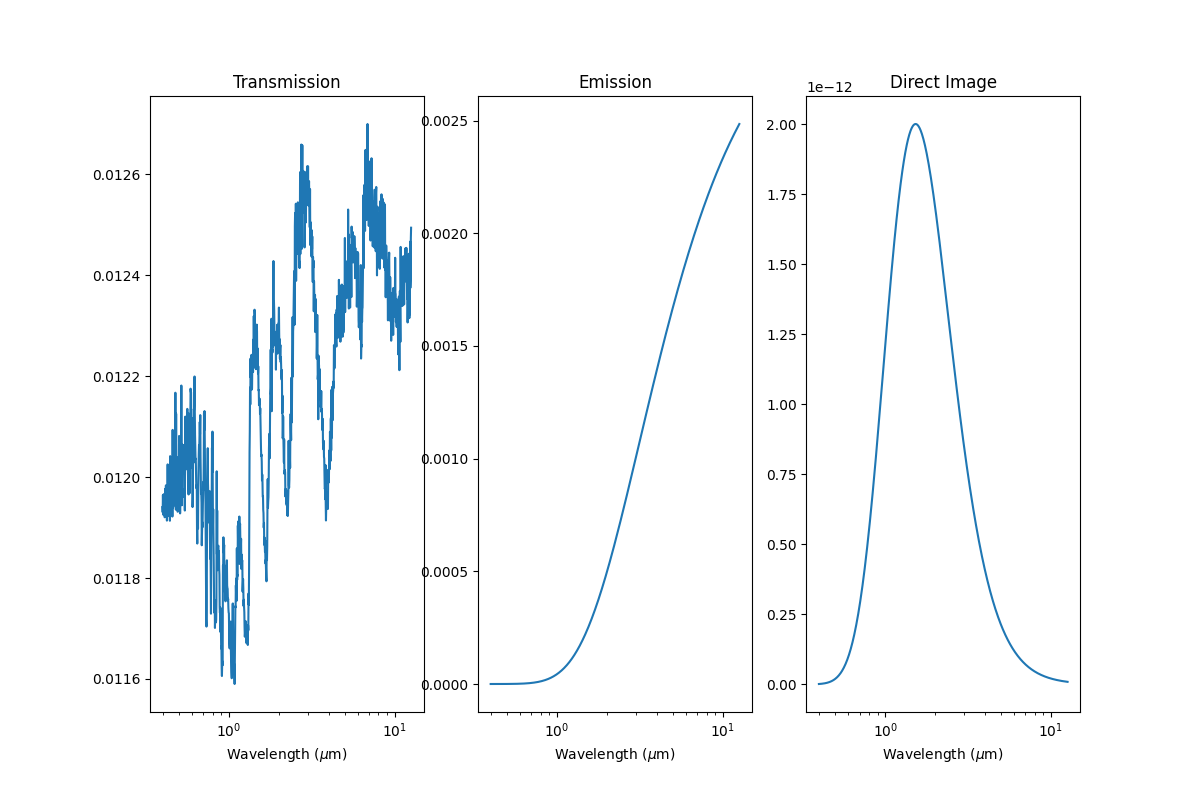

taurex.TransmissionModel - INFO - Computing pressure profile


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.Absorption - INFO - Done
taurex.CIA - INFO - Computing CIA 
taurex.CIA - INFO - Done
taurex.Rayleigh - INFO - Done
taurex.EmissionModel - INFO - Computing pressure profile


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.Absorption - INFO - Done
taurex.CIA - INFO - Computing CIA 
taurex.CIA - INFO - Done
taurex.Rayleigh - INFO - Done
taurex.DirectImageModel - INFO - Computing pressure profile


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.Absorption - INFO - Done
taurex.CIA - INFO - Computing CIA 
taurex.CIA - INFO - Done
taurex.Rayleigh - INFO - Done


Text(0.5, 0, 'Wavelength ($\\mu$m)')

In [14]:
wngrid = np.sort(10000/np.logspace(-0.4,1.1,1000))

all_fig = plt.figure(figsize=(12,8))
tm_ax = all_fig.add_subplot(1,3,1)
em_ax = all_fig.add_subplot(1,3,2)
di_ax = all_fig.add_subplot(1,3,3)
model_tm, = tm_ax.plot(10000/wngrid,bn.bin_model(tm.model(wngrid))[1])
model_em, = em_ax.plot(10000/wngrid,bn.bin_model(em.model(wngrid))[1])
model_di, = di_ax.plot(10000/wngrid,bn.bin_model(di.model(wngrid))[1])
tm_ax.set_xscale('log')
em_ax.set_xscale('log')
di_ax.set_xscale('log')
tm_ax.set_title('Transmission')
em_ax.set_title('Emission')
di_ax.set_title('Direct Image')
tm_ax.set_xlabel(r"Wavelength ($\mu$m)")
em_ax.set_xlabel(r"Wavelength ($\mu$m)")
di_ax.set_xlabel(r"Wavelength ($\mu$m)")


# TauREx can iteratively change the model as you go with update_model

### Retrievals

In [16]:
# Retrievals required data! Let's load her in 
from taurex.data.spectrum.observed import ObservedSpectrum
obs = ObservedSpectrum('/Users/mbieger/OneDrive - University of Exeter/planetspectra/wasp_79b/spectra/WASP-79_transmission_hstspitz.dat')

<IPython.core.display.Javascript object>


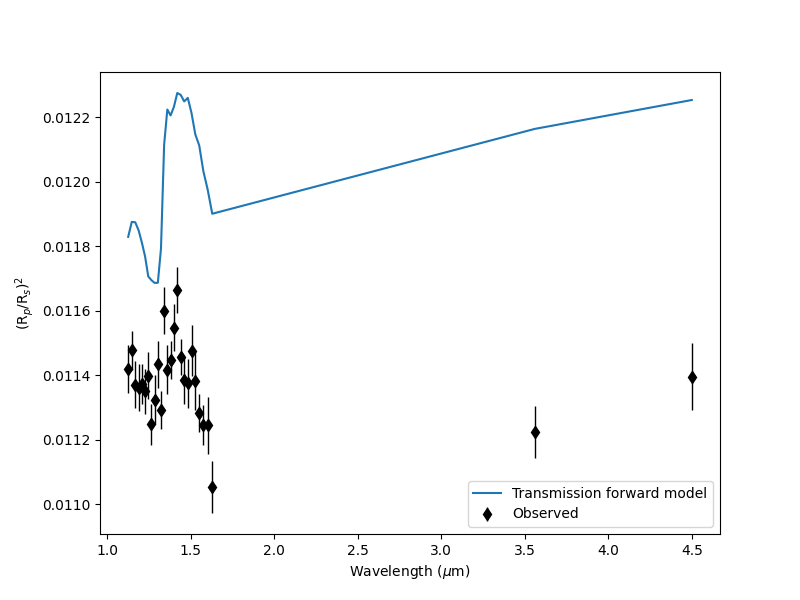

taurex.TransmissionModel - INFO - Computing pressure profile


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.Absorption - INFO - Done
taurex.CIA - INFO - Computing CIA 
taurex.CIA - INFO - Done
taurex.Rayleigh - INFO - Done


In [17]:
# Binning down the native data 
obin = obs.create_binner()

# Plotting the data 
plt.figure(figsize=(8,6))
plt.errorbar(obs.wavelengthGrid,obs.spectrum,obs.errorBar,lw=1,color='black',marker='d',ls='none',zorder=1,label='Observed')

plt.plot(obs.wavelengthGrid,obin.bin_model(tm.model(obs.wavenumberGrid))[1],label='Transmission forward model')

plt.xlabel(r"Wavelength ($\mu$m)")
plt.ylabel(r"(R$_p$/R$_s)^2$")
plt.legend(loc='best')
plt.show()

In [18]:
# Choosing the parameter estimation sampler: Nestle 

from taurex.optimizer.nestle import NestleOptimizer
opt = NestleOptimizer(num_live_points=50)

# Giving it our forward model (transmission) and the observations 
opt.set_model(tm)
opt.set_observed(obs)

# Giving it our preferred parameters to fit and their prior boundaries 
opt.enable_fit('planet_radius')
opt.enable_fit('T')
opt.set_boundary('T',[1200,2300])
opt.set_boundary('planet_radius',[0.5,2])

taurex.Nestle - INFO - Initializing parameters
taurex.Nestle - INFO - -------FITTING---------------
taurex.Nestle - INFO - Parameters to be fit:
taurex.Nestle - INFO - planet_radius: Value: 1.53 Type:Uniform Params:Bounds = [0.5,2]
taurex.Nestle - INFO - T: Value: 1900.0 Type:Uniform Params:Bounds = [1200,2300]
taurex.Nestle - INFO - 
taurex.Nestle - INFO - -------------------------------------
taurex.Nestle - INFO - ------Retrieval Parameters-----------
taurex.Nestle - INFO - -------------------------------------
taurex.Nestle - INFO - 
taurex.Nestle - INFO - Dimensionality of fit: 2
taurex.Nestle - INFO - 
taurex.Nestle - INFO - 
Param            Value  Type     Args
-------------  -------  -------  --------------------
planet_radius     1.53  Uniform  Bounds = [0.5,2]
T              1900     Uniform  Bounds = [1200,2300]


taurex.Nestle - INFO - 


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/che

it=    64 logz=-35375.360418/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=    65 logz=-35306.140649/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=    66 logz=-34053.048599/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=    67 logz=-30418.039397/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=    68 logz=-27884.128314/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=    69 logz=-26503.957661/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=    70 logz=-23152.248616/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=    71 logz=-22590.253563/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=    72 logz=-21202.551755/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   138 logz=-1833.946266/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   139 logz=-1781.758397/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   140 logz=-1774.443461/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   141 logz=-1602.433518/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   142 logz=-1554.121351/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   143 logz=-1425.119221/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   144 logz=-1316.290529/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   145 logz=-1305.455280/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   146 logz=-1299.449731/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   147

/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   222 logz=72.349187/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   223 logz=75.259589/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   224 logz=76.307186/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   225 logz=76.943884/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   226 logz=79.511861/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   227 logz=80.380685/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   228 logz=81.092010/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   229 logz=81.728754/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   230 logz=82.391124/Users/mbieger/atmo/tutorial/chem_eq

it=   293 logz=146.874481/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   294 logz=147.265935/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   295 logz=147.672535/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   296 logz=147.991739/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   297 logz=148.293637/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   298 logz=148.554663/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   299 logz=148.802171/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   300 logz=149.098922/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   301 logz=149.586775/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   302 logz=149.913814/U

it=   368 logz=169.732741/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   369 logz=169.872428/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   370 logz=170.047013/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   371 logz=170.243725/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   372 logz=170.542484/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   373 logz=170.841022/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   374 logz=171.115925/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   375 logz=171.422955/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   376 logz=171.825198/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   377 logz=172.325336/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   378 logz=172.668144/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   379 logz=173.04

/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   450 logz=181.021808/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   451 logz=181.091491/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   452 logz=181.169710/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   453 logz=181.251444/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   454 logz=181.329021/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   455 logz=181.404597/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   456 logz=181.473563/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   457 logz=181.539154/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/m

it=   529 logz=184.303935/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   530 logz=184.328478/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   531 logz=184.352198/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   532 logz=184.375976/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   533 logz=184.398805/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   534 logz=184.420892/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   535 logz=184.442487/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   536 logz=184.463496/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   537 logz=184.484329/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
it=   538 logz=184.504601/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/U

taurex.Nestle - INFO - Sampling time 6103.38041806221 s
taurex.Nestle - INFO - Post-processing - Generating spectra and profiles
taurex.Nestle - INFO - Computing solution 0
taurex.TransmissionModel - INFO - Computing pressure profile


niter: 604
ncall: 1111
nsamples: 654
logz: 185.707 +/-  0.444
h:  9.876
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.Absorption - INFO - Done
taurex.CIA - INFO - Computing CIA 
taurex.CIA - INFO - Done
taurex.Rayleigh - INFO - Done
taurex.TransmissionModel - INFO - Computing pressure profile


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.Absorption - INFO - Done
taurex.CIA - INFO - Computing CIA 
taurex.CIA - INFO - Done
taurex.Rayleigh - INFO - Done
taurex.TransmissionModel - INFO - Computing pressure profile


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.TransmissionModel - INFO - Modelling each contribution.....
taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.TransmissionModel - INFO - 	Absorption---CO contribtuion
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.TransmissionModel - INFO - 	Absorption---H2O contribtuion
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.TransmissionModel - INFO - 	Absorption---CH4 contribtuion
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.TransmissionModel - INFO - 	Absorption---CO2 contribtuion
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.TransmissionModel - INFO - 	Absorption---NH3 contribtuion
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.TransmissionModel - INFO - 	Absorption---TiO contribtuion
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.TransmissionModel - INFO - 	Absorption---VO contrib

/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Absorption - INFO - Using cross-sections? True
taurex.Absorption - INFO - Recomputing active gas CO opacity
taurex.Absorption - INFO - Recomputing active gas H2O opacity
taurex.Absorption - INFO - Recomputing active gas CH4 opacity
taurex.Absorption - INFO - Recomputing active gas CO2 opacity
taurex.Absorption - INFO - Recomputing active gas NH3 opacity
taurex.Absorption - INFO - Recomputing active gas TiO opacity
taurex.Absorption - INFO - Recomputing active gas VO opacity
taurex.Absorption - INFO - Done
taurex.CIA - INFO - Computing CIA 
taurex.CIA - INFO - Done
taurex.Rayleigh - INFO - Done
taurex.Nestle - INFO - ------------Variance generation step------------------
taurex.Nestle - INFO - We are sampling 65 points for the profiles
taurex.Nestle - INFO - I will only iterate through partitioned 65 points (the rest is in parallel)


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Nestle - INFO - Progress 15.384615384615385%


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Nestle - INFO - Progress 30.76923076923077%


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Nestle - INFO - Progress 46.15384615384615%


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Nestle - INFO - Progress 61.53846153846154%


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Nestle - INFO - Progress 76.92307692307692%


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


taurex.Nestle - INFO - Progress 92.3076923076923%


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


/Users/mbieger/Documents/repos/atmopy/.venv/lib/python3.10/site-packages/taurex/model/simplemodel.py:578: RuntimeWarning: invalid value encountered in sqrt
  inactive_std = np.sqrt(inactive_gases.parallelVariance())
taurex.Nestle - INFO - Computing derived parameters......


/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/che

/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/che

/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/che

/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/chem_eq/atmo.x
/Users/mbieger/atmo/tutorial/che

taurex.Nestle - INFO - Post-processing - Complete
taurex.Nestle - INFO - 
taurex.Nestle - INFO - -------------------------------------
taurex.Nestle - INFO - ------Final results------------------
taurex.Nestle - INFO - -------------------------------------
taurex.Nestle - INFO - 
taurex.Nestle - INFO - Dimensionality of fit: 2
taurex.Nestle - INFO - 
taurex.Nestle - INFO - 
---Solution 0------
taurex.Nestle - INFO - 
Param                 MAP     Median
-------------  ----------  ---------
planet_radius     1.52623     1.5257
T              1200.3      1209.16




<IPython.core.display.Javascript object>


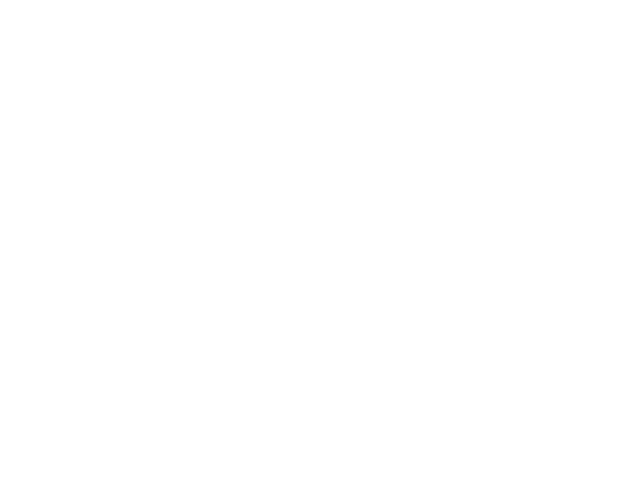

/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


In [19]:
# Fitting the retrieval 
solution = opt.fit()
taurex.log.disableLogging()

<IPython.core.display.Javascript object>


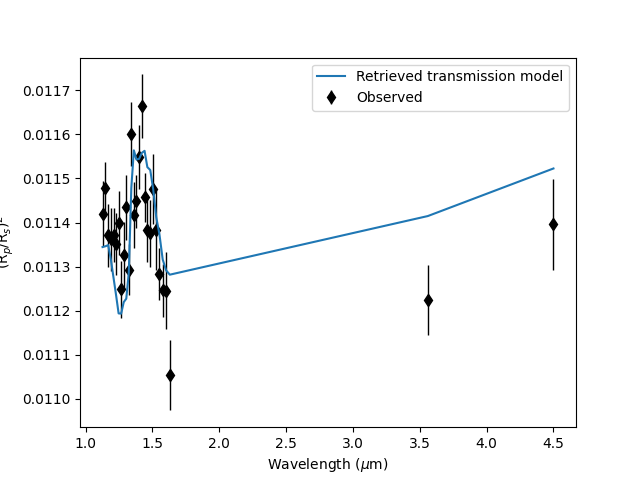

/Users/mbieger/atmo/tutorial/chem_eq/atmo.x


In [20]:
# Plotting the solution via loop 
for solution,optimized_map,optimized_value,values in opt.get_solution():
    opt.update_model(optimized_map)
    plt.figure()
    plt.errorbar(obs.wavelengthGrid,obs.spectrum,obs.errorBar,lw=1,color='black',marker='d',ls='none',zorder=1,label='Observed')
    plt.plot(obs.wavelengthGrid,obin.bin_model(tm.model(obs.wavenumberGrid))[1],label='Retrieved transmission model')
    plt.xlabel(r"Wavelength ($\mu$m)")
    plt.ylabel(r"(R$_p$/R$_s)^2$")
    plt.legend()
    plt.show()

# Compare/contrasting to other TauREx chemistry models

Remember the models we've just set up? Let's see how it ATMO chemistry compares to other available chemistry plugin models.

In [ ]:
# from taurex.chemistry import TaurexChemistry
# chemistry = TaurexChemistry(fill_gases=['H2','He'],ratio=0.172)